<a href="https://colab.research.google.com/github/buddy-finch/Fall2022_CSC532_Project_Alex_Team/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 415
**Homework 5** 

## Part 1.

Find the true solution.  Plot it to find when would Tom catch Jerry.

Exact Solution calculated by hand using Integrating Factor:

 $S(a,t) = 50a(t-50+50e^{-0.02t})+150e^{-0.02t}-50$

 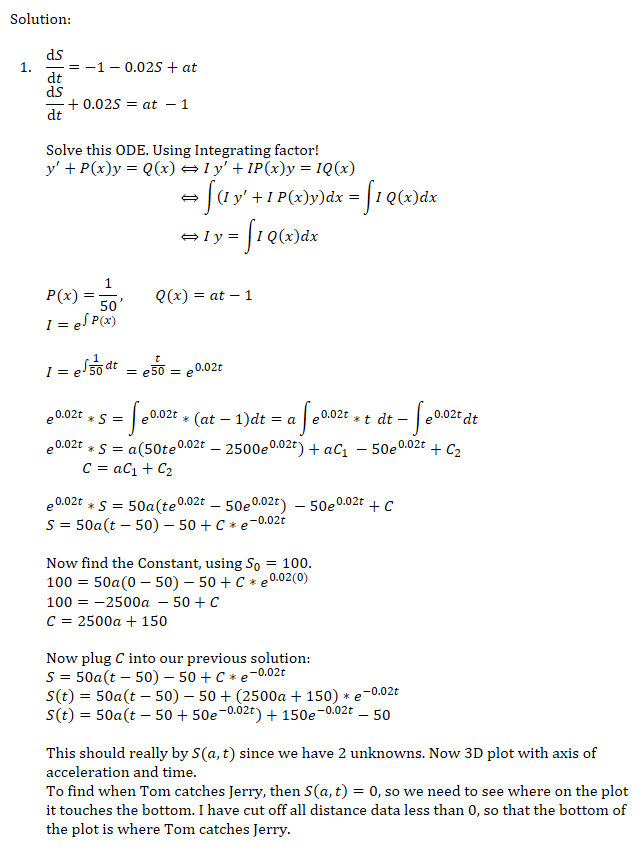

In [ ]:
# Use of SYMPY to solve the differential equation 
import sympy as sy

sy.init_printing()

a, t = sy.symbols('a t')

S = sy.Function('S')
S_ = sy.Derivative(S(t), t)

equ = sy.Eq(S(t).diff(t), -1 - 0.02 * S(t) + a * t)
sol = sy.dsolve(equ, ics={S(0): 100})

print('Solution calculated using Sympy:')
display(sy.expand(sol))

Solution calculated using Sympy:


                                       -0.02⋅t                 -0.02⋅t
S(t) = 50.0⋅a⋅t - 2500.0⋅a + 2500.0⋅a⋅ℯ        - 50.0 + 150.0⋅ℯ       

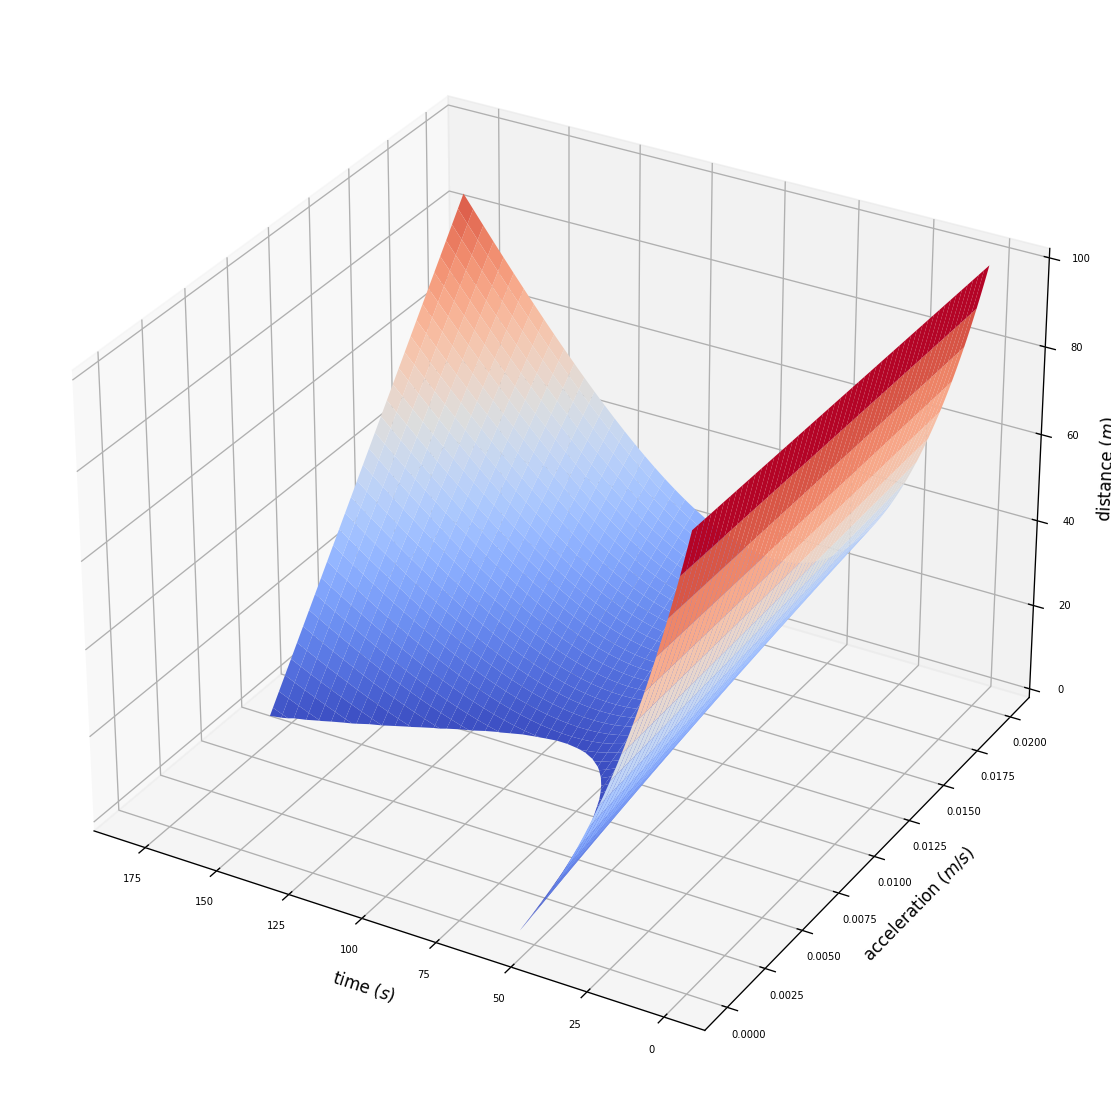

In [ ]:
!pip install matplotlib --upgrade --quiet
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors

def f(x,y):
  return 50*x*(y-50+50*np.exp(-0.02*y))+150*np.exp(-0.02*y)-50

fig = plt.figure(figsize=(12,12), dpi=120)
ax = fig.add_subplot( 111, projection="3d" )
ax.set_ylabel('acceleration $(m/s)$')
ax.set_xlabel('time $(s)$')
ax.set_zlabel('distance $(m)$')
accel = np.linspace(0,0.02,1000)
time = np.linspace(0,180,1000)
x,y = np.meshgrid(accel, time)
distance = f(x,y)

for i in range(len(x)):
    for j in range(len(y)):
        if (distance[j,i] < 0):
            distance[j,i] = np.NaN
ax.set_zlim(0,100)

ax.plot_surface(y,x,distance, cmap=cm.coolwarm, vmin=0)

# ax.contour(y, x, distance, levels=[0]) 
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.zaxis.set_tick_params(labelsize=6)
#plt.margins(x=0, y=0)

ax.invert_xaxis()
fig.show()



If we pick $a=0.01$ and follow it across the graph, we will see that Tom catches Jerry about 82 seconds.  I graphed this so that the bottom of the graph is when $S(a,t)=0$ so that we can just follow this curve.

## Part 2.

If $a=0.01\frac{m}{s^2}$, use the Runge-Kutta 4th order method to compute when will Tom catch Jerry. Use a step size so that your result is reasonably accurate.

4th Order Runge-Kutta

$w_0 = \alpha$


> $k_1 = h f(t_i, w_i) $

> $k_2 = h f(t_i + \frac{h}{2}, w_i + \frac{1}{2}k_1) $

> $k_3 = h f(t_i + \frac{h}{2}, w_i + \frac{1}{2}k_2) $

> $k_4 = h f(t_{i+1}, w_i + k_3) $

$w_{i+1} = w_i + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)  $

Solution Values are provided at the bottom in comparison with the Adams-Bashforth method!


In [ ]:
def dSdt(t, S):
  return -1 - 0.02*S + 0.01*t

# Start and end of interval
b=180     # End Time Range (2 minutes)
a=0       # Begin Time Range

# Step size
N=360
h=(b-a)/(N)
t=np.arange(a,b+h,h)
print(f'Step size:  h={h}')

# Initial Condition
IC=100
S=np.zeros(N+1)
S[0]=IC

#Exact Solution
y = 50 * 0.01 * (t - 50 + 50 * np.exp(-0.02*t)) + 150 *np.exp(-0.02*t) - 50

for k in range (0,N):
    k1=dSdt(t[k],S[k])
    k2=dSdt(t[k]+h/2,S[k]+h/2*k1)
    k3=dSdt(t[k]+h/2,S[k]+h/2*k2)
    k4=dSdt(t[k]+h,S[k]+h*k3)
    S[k+1]=S[k]+h/6*(k1+2*k2+2*k3+k4)
    if S[k]>0 and S[k+1]<0:     # This is when Tom catches Jerry
      print(f'Tom catches Jerry about {t[k+1]} seconds')


Step size:  h=0.5
Tom catches Jerry about 82.0 seconds


# Part 3.
**4th Order Adams-Bashforth Method**

Use Adams-Bashforth technique with your result in R-K method as initial values to compute when Tom will catch Jerry.

$w_0 = \alpha,\quad w_1=\alpha_1,\quad w_2=\alpha_2,\quad w_3=\alpha_3$

$w_{i+1}=w_i + \frac {h} {24} \Bigl[55f(t_{i},w_{i})-59f(t_{i-1},w_{i-1})+37f(t_{i-2},w_{i-2})-9f(t_{i-3},w_{i-3})\Bigr] $

So I need to use 4th order R-K to get the first 4 starting values.  These were already calculated above, so I will just use those values. I will also use the same step size, etc. from previous.

In [ ]:
print(f'R-K4 values used: {S[0:4]}')

def f(t,s):
  return -1 - 0.02*s + 0.01*t

ABM=np.zeros(N+1)

# Save the first 4 time steps from RK4 method
for i in range(0,4):
  ABM[i]=S[i]

# Calculate i+1 
for i in range(3, N):
  f0 = f(t[i], ABM[i])
  f1 = f(t[i-1], ABM[i-1])
  f2 = f(t[i-2], ABM[i-2])
  f3 = f(t[i-3], ABM[i-3])
  ABM[i+1] = ABM[i] + (h/24) * ( 55 * f0 - 59 * f1 + 37 * f2 - 9 * f3)
  if ABM[i]>0 and ABM[i+1]<0:     # This is when Tom catches Jerry
      print(f'Tom catches Jerry about {t[i+1]} seconds')


R-K4 values used: [100.          98.50872091  97.03476783  95.57796837]
Tom catches Jerry about 82.0 seconds


Comparison between the Runge-Kutta 4th order method and Adams-Bashforth 4th order method.

In [ ]:
import pandas as pd

# d = {'time': t[140:200], '4th Order R-K: S': S[140:200],'Exact S':y[140:200],'Error |S-y|':np.round(np.abs(y[140:200]-S[140:200]),10)}
#d = {'time': t[140:200], 'R-K': S[140:200],'Adams-Bashforth':y[140:200],'Difference ':np.round(np.abs(ABM[140:200]-S[140:200]),10)}
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):

  d = {'time': t, 'R-K': S,'Adams-Bashforth':y,'Difference ':np.round(np.abs(ABM-S),10)}
  df = pd.DataFrame(data=d)
  print(df)  

      time      R-K  Adams-Bashforth  Difference 
0      0.0  100.000          100.000    0.000e+00
1      0.5   98.509           98.509    0.000e+00
2      1.0   97.035           97.035    0.000e+00
3      1.5   95.578           95.578    0.000e+00
4      2.0   94.138           94.138    5.800e-09
5      2.5   92.715           92.715    1.150e-08
6      3.0   91.309           91.309    1.710e-08
7      3.5   89.919           89.919    2.260e-08
8      4.0   88.545           88.545    2.790e-08
9      4.5   87.188           87.188    3.320e-08
10     5.0   85.847           85.847    3.830e-08
11     5.5   84.521           84.521    4.340e-08
12     6.0   83.211           83.211    4.830e-08
13     6.5   81.917           81.917    5.310e-08
14     7.0   80.638           80.638    5.790e-08
15     7.5   79.374           79.374    6.250e-08
16     8.0   78.125           78.125    6.700e-08
17     8.5   76.891           76.891    7.150e-08
18     9.0   75.672           75.672    7.580e-08


# Part 4
Can Tom catch Jerry if he hasn't already after 2 minutes?

Tom catches Jerry whenever the distance between them is zero, or when the distance changes sign. So I need to plot the sign change of the distance with respect to acceleration and time. But Tom only catches Jerry with the distance changes from positive to negative. When the sign changes from negative to positive, Jerry is increasing his distance from Tom.  So according to the exact solution, if Tom's acceleration is too high (above approximately 0.013), he'll never catch Jerry. But no matter what his acceleration is, if he doesn't catch Jerry within approximately 90 seconds he'll never catch Jery.

The graph provided shows the line where the distance changes sign. So when you pick an acceleration and follow it to the right, the first time you cross the line, you are going from positive distance to negative (Tom catches Jerry)!  But if you continue further to the right, you'll see another sign change, this is where the distance goes from negative to positive, which is when Jerry starts to pull away from Tom.

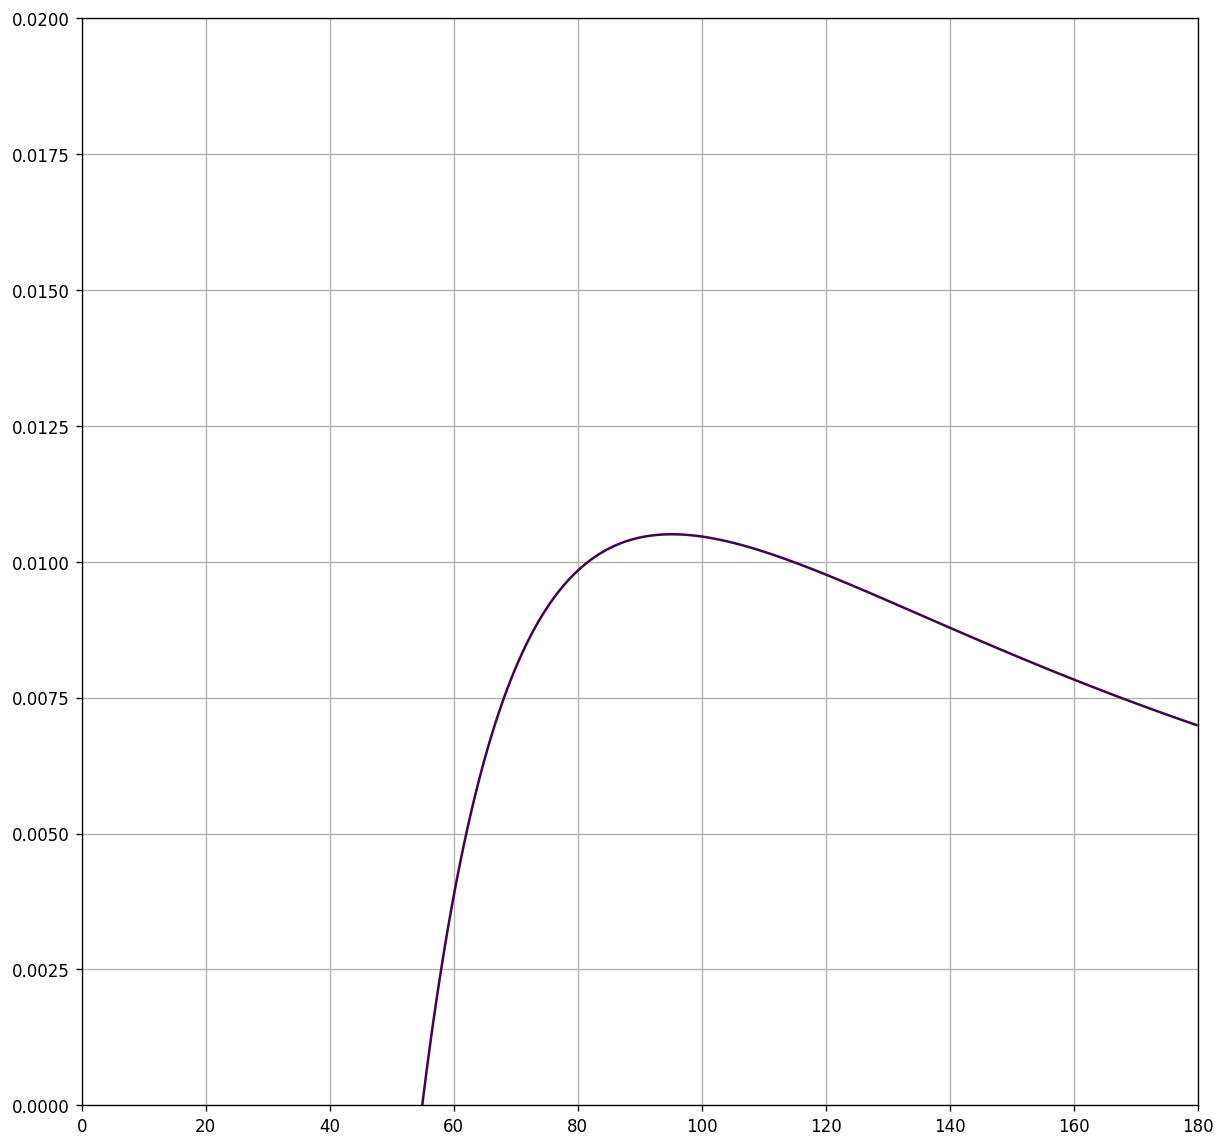

In [ ]:
Acc = np.linspace(0., 0.02, 20)
Time = np.linspace(0, 180, 360)

A,T = np.meshgrid(Acc,Time)
distance = 50*A*(T-50+50*np.exp(-0.02*T))+150*np.exp(-0.02*T)-50
#distance = (A*T-1)/0.02

fig2 = plt.figure(figsize=(12,12), dpi=120)
#ax = fig2.add_subplot(111, projection = '3d')
ax = fig2.add_subplot(111)
#ax.plot_surface(A, T, distance)
#ax.contour(T,A,distance,levels=[0])
ax.contour(T,A,distance, levels=[0])

ax.grid()
# plt.xlabel('time')
# plt.ylabel('accel')


plt.show()
